In [4]:
# Standard import(s)
import numpy as np
import csv
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# Keras import(s)
#if float(tf.__version__[:3])>2.8:
from tensorflow.keras.utils import plot_model
#from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.layers import BatchNormalization,Input, Dense, Dropout, Flatten, Reshape, Conv2D, MaxPooling2D, Conv2DTranspose, Concatenate, Lambda, UpSampling2D
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.losses import mae
from tensorflow.keras.losses import mean_squared_error 
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.backend import set_image_data_format
from tensorflow.keras.optimizers import Adam
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
set_image_data_format('channels_last')  # Images are formatted as (N, N, 1), with colour-channels last

# Keras import(s)
if float(tf.__version__[:3])>2.8:
    from tensorflow.keras.utils import plot_model
else:
    from tensorflow.keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling2D, AveragePooling2D, UpSampling2D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras import regularizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import sklearn.model_selection as model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV




In [5]:
df = pd.read_csv( "numu_energy_studies.csv")   #read data file into pandas dataframe
df = df.drop(df.columns[0], axis=1)            #drop first column containing column numbers
df.dropna(inplace = True)                      #drop rows containing null valeus
df.count()                                     #check number of entries is equal in all the columns

i                   163592
neutrinoE           163592
trueKE              163592
recoE_lookup        163592
total_PMTs_hits2    163592
total_hits2         163592
total_ring_PEs2     163592
pot_length2         163592
hits_pot_length2    163592
recoDWallR2         163592
recoDWallZ2         163592
lambda_max_2        163592
recoDWall_2         163592
recoToWall_2        163592
vtxTrackBias_2      163592
dtype: int64

In [6]:
df.head(5)              #dataframe looks good

,i,neutrinoE,trueKE,recoE_lookup,total_PMTs_hits2,total_hits2,total_ring_PEs2,pot_length2,hits_pot_length2,recoDWallR2,recoDWallZ2,lambda_max_2,recoDWall_2,recoToWall_2,vtxTrackBias_2
0,0,664.541,236.327,22.35380,0.000000,0.023325,0.00000,0.662787,0.003754,0.003389,0.458415,0.650854,0.003389,0.220977,-0.011905
1,3,400.551,186.765,2.46971,0.000000,0.010075,0.00000,0.662787,0.001621,0.003389,0.458415,0.405903,0.003389,0.220977,-2.269040
2,4,633.353,448.481,409.95400,0.308444,0.080400,0.13070,0.531171,0.016146,0.035389,0.753969,0.537975,0.035389,0.494926,0.024453
3,7,845.921,586.647,37.83740,0.000000,0.011950,0.00000,0.918554,0.001388,0.042498,0.083664,0.830098,0.042498,0.805578,-0.007114
4,9,1323.140,963.822,1408.07000,0.111333,0.142300,0.26265,0.093641,0.162093,0.616305,0.164307,0.092105,0.358487,0.135845,-0.004307


In [7]:
#define input feature names and target name
inputs = ['total_hits2','total_ring_PEs2','recoDWallR2','recoDWallZ2','lambda_max_2']
output = ['trueKE']
combined = inputs + output


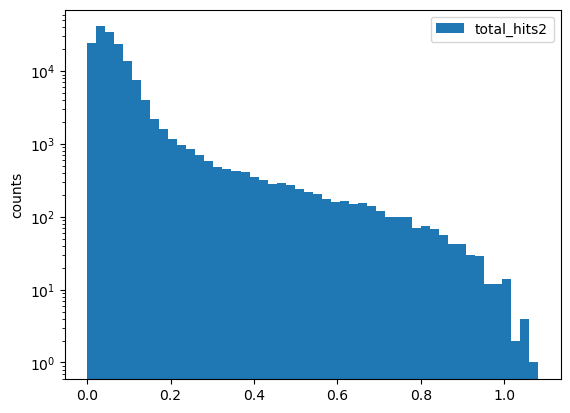

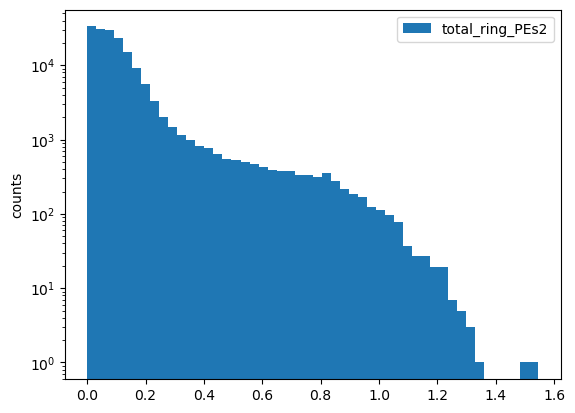

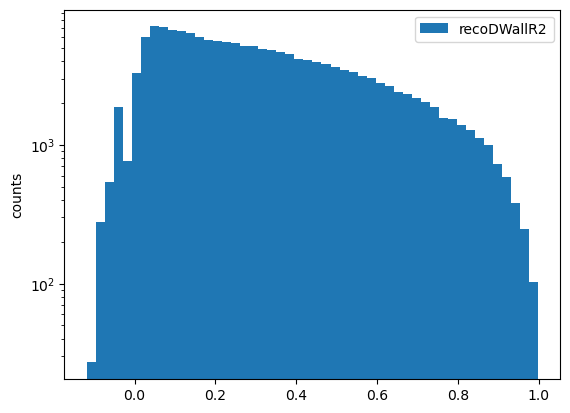

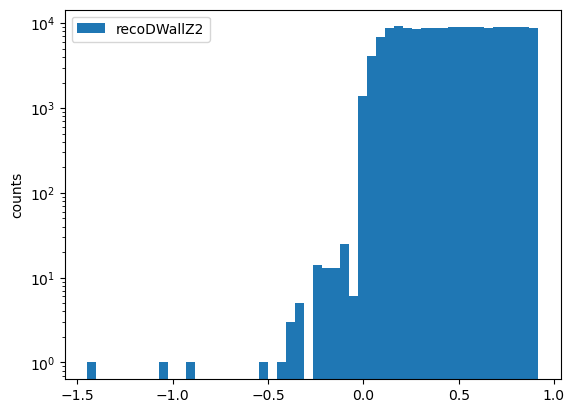

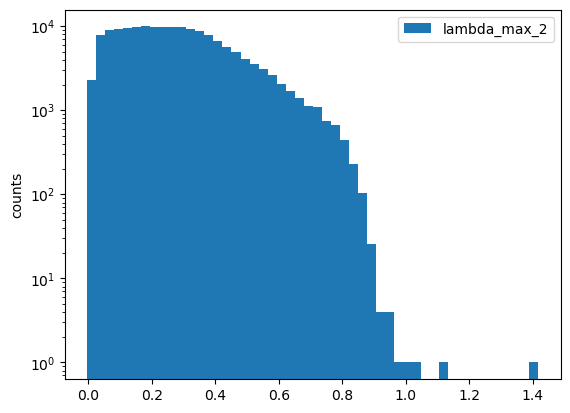

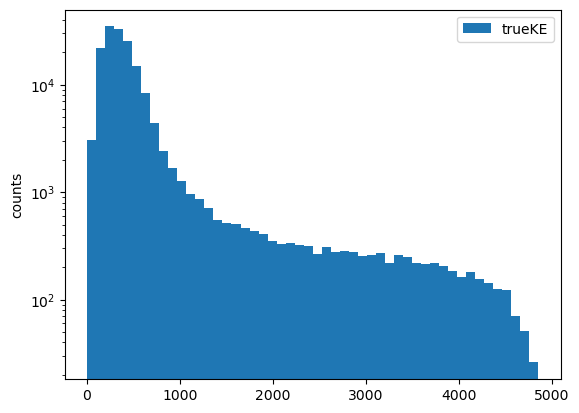

In [8]:
nbins =50
#iterate through input features and target and plot histograms
for i in range(len(combined)):
    plt.hist(df[combined[i]], bins=nbins,label = combined[i],log = True)
    plt.ylabel('counts')
    plt.legend()
    plt.show()

In [9]:
input_data = df[inputs]         #creating input feature and output dataframes
target = df[output]

In [10]:
Answer_to_all_questions = 42           #random seed
# train - test split of dataset
train_data , test_data , train_target , test_target = model_selection.train_test_split(input_data , target , test_size =0.3 , random_state = Answer_to_all_questions)
print(train_data.shape,train_target.shape ,test_data.shape ,test_target.shape )

(114514, 5) (114514, 1) (49078, 5) (49078, 1)


In [11]:
#Create sequential model with 1 hidden layer and 2 dropout layers
#dropout layers reduce overtraining
def model():
    # create model
    model = Sequential()
    #  regression problem so no activation func in output,
    #relu activation is used in input and hidden layer
    model.add(Dense(num_nodes,input_dim = num_inputs, kernel_initializer = 'normal',activation ='relu'))
    # dropout to reduce overtraining
    model.add(Dropout(0.1)) 
    
    #hidden layer
    model.add(Dense(num_nodes,input_dim = num_nodes, kernel_initializer = 'normal',activation ='relu')) 
    model.add(Dense(num_outputs, kernel_initializer ='normal'))
    # Use MSE losss
    model.compile(loss = 'mean_squared_error', optimizer ='adam')
    return model


In [12]:

#set params
N_epochs = 50
batchsize = 500
extra_depth = 1           #not used
num_nodes =5 
num_inputs = 5
num_outputs = 1


In [13]:
callbacks_ = [
#stop training if not validation accuracy increase in 10 epochs
EarlyStopping ( verbose = True , patience =10 , monitor = 'loss'),
# Save model weights with the best accuracy
ModelCheckpoint ('model.h5' , monitor = 'loss',save_best_only = True , mode ='max')]

In [20]:

np.random.seed(Answer_to_all_questions)       #random seed
estimators = []
estimators.append(( 'mlp', KerasRegressor(build_fn = model,epochs= N_epochs ,batch_size = batchsize,verbose = 1)))   #create estimator models
pipeline = Pipeline(estimators)           #chains estimators together 
kfold = KFold(n_splits =10,random_state = Answer_to_all_questions ,shuffle = True )    #use k-fold validation
# data and target are 5-column and 1-column arrays produced with pandas.DataFrame.values
results = cross_val_score(pipeline ,train_data ,train_target ,cv = kfold ,
fit_params = {'mlp__callbacks': callbacks_ } , scoring ='r2')



C:\Users\Theo\AppData\Local\Temp\ipykernel_1348\172553255.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(( 'mlp', KerasRegressor(build_fn = model,epochs= N_epochs ,batch_size = batchsize,verbose = 1)))   #create estimator models


In [12]:
print("R-squared = {:.2f}".format(results.mean()))
print("Standard deviation = {:.2f}".format(results.std()))


R-squared = 0.71
Standard deviation = 0.02


Decent performance, just over 70% R-squared.

In [13]:
#fit the model
the_model = model()   
history = the_model.fit(train_data,train_target,batch_size = batchsize,epochs = N_epochs,verbose =1 ,validation_data =(test_data ,test_target))

Train on 114514 samples, validate on 49078 samples
Epoch 1/50
113500/114514 [============================>.] - ETA: 0s - loss: 638041.8951

C:\Users\Theo\Anaconda3\envs\daml\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


114514/114514 [==============================] - 2s 17us/sample - loss: 638792.1322 - val_loss: 635436.6235
Epoch 2/50
114514/114514 [==============================] - 1s 6us/sample - loss: 627661.1077 - val_loss: 611328.7382
Epoch 3/50
114514/114514 [==============================] - 1s 6us/sample - loss: 586371.5789 - val_loss: 551281.2876
Epoch 4/50
114514/114514 [==============================] - 1s 6us/sample - loss: 512768.3784 - val_loss: 465786.3050
Epoch 5/50
114514/114514 [==============================] - 1s 6us/sample - loss: 430072.1238 - val_loss: 386048.0686
Epoch 6/50
114514/114514 [==============================] - 1s 7us/sample - loss: 370545.1944 - val_loss: 338269.0314
Epoch 7/50
114514/114514 [==============================] - 1s 6us/sample - loss: 342059.5131 - val_loss: 318300.5381
Epoch 8/50
114514/114514 [==============================] - 1s 7us/sample - loss: 330798.6037 - val_loss: 308687.1293
Epoch 9/50
114514/114514 [==============================] - 1s 7us

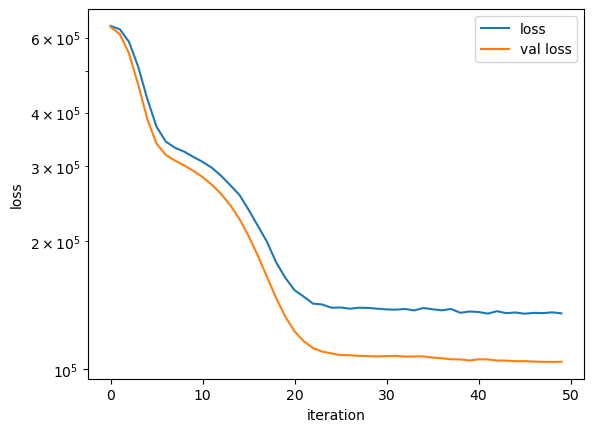

In [14]:
#plot loss curves
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'],label = 'val loss')

plt.yscale('log')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend()
plt.show()

#val loss decreases with loss which is a good sign we are not overtraining

In [15]:
prediction = the_model.predict(test_data) #get array of predicted energy values

C:\Users\Theo\Anaconda3\envs\daml\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Text(0.5, 0, 'Actual')

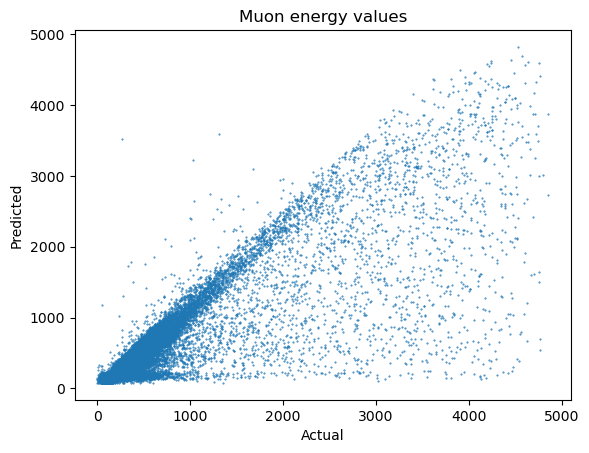

In [16]:
plt.scatter(test_target,prediction,s = 0.2)   #plot predicted vs actual
plt.title('Muon energy values')
plt.ylabel('Predicted')
plt.xlabel('Actual')

Gradient boosting approach

In [15]:
#default params with gradient boost regressor
gbr0 = GradientBoostingRegressor(n_estimators =100)
#fit gradient boosted regressor with training set
gbr0.fit(train_data ,train_target.values.ravel())               

GradientBoostingRegressor()

In [16]:
#get gbr test and training scores
train_rsquared = gbr0.score(train_data,train_target.values.ravel())
test_rsquared = gbr0.score(test_data,test_target.values.ravel())

print("Training data R-squared = {:.4f}".format(train_rsquared))
print("Test data R-squared = {:.4f}".format(test_rsquared))

Training data R-squared = 0.7831
Test data R-squared = 0.7818


The R-squared values from  the gradient boosting approach are significantly higher than the R-squared result from the NN regressor. There is an ~ 0.1 increase in R_squared score which equates to ~ 10% improvement. 

The test and training R-squared values differ by 0.0013 so it is unlikely that we are overfitting.

In [21]:
#grid search method 

#define parameters to perform grid search on
param_grid_ = {
'n_estimators' : [100],
'learning_rate' : [0.1, 0.05] ,
'max_depth' : [5 , 10],
'min_samples_leaf' : [50 ,100],
}


njobs_ =8 # jobs to run in parallel
np.random.seed( Answer_to_all_questions )
gbr = GradientBoostingRegressor()

#use halving grid search for grid search. This is quicker than GridSearchCV method
classifier = HalvingGridSearchCV(estimator = gbr , cv = kfold, param_grid = param_grid_ , n_jobs = njobs_ , verbose =1)
classifier.fit(train_data ,train_target.values.ravel())            


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 38171
max_resources_: 114514
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 38171
Fitting 10 folds for each of 8 candidates, totalling 80 fits
----------
iter: 1
n_candidates: 3
n_resources: 114513
Fitting 10 folds for each of 3 candidates, totalling 30 fits


HalvingGridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                    estimator=GradientBoostingRegressor(), n_jobs=8,
                    param_grid={'learning_rate': [0.1, 0.05],
                                'max_depth': [5, 10],
                                'min_samples_leaf': [50, 100],
                                'n_estimators': [100]},
                    verbose=1)

In [22]:
print("Best estimator : ", classifier.best_estimator_) 


Best estimator :  GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=50)


Plots of learning rate

In [23]:
from sklearn.model_selection import learning_curve


In [71]:
#get train and validation scores to plot performance of best param regressor for training set
train_sizes, train_scores, test_scores = learning_curve(classifier, train_data, train_target.values.ravel(), train_sizes=np.linspace(0.1, 1, 5),cv=10,n_jobs = njobs_,verbose = 1 )


[learning_curve] Training set sizes: [ 10306  33495  56684  79873 103062]


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 458.4min finished


In [72]:
#get train and validation averages
train_avg = np.mean(train_scores, axis =1)                  #training scores                   
test_avg = np.mean(test_scores, axis =1)                    #validation scores

train_std = np.std(train_scores, axis =1)
test_std = np.std(test_scores, axis =1)


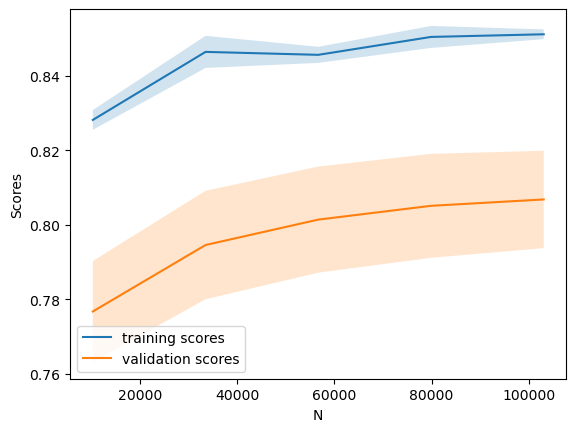

In [90]:
#plot learning curves for train and test data
plt.plot(train_sizes,train_avg,label = 'training scores')
plt.plot(train_sizes,test_avg,label = 'validation scores')

#plot area between standard deviations
plt.fill_between(train_sizes.flatten(),(train_avg - train_std).flatten(), (train_avg + train_std).flatten(),alpha = 0.2)
plt.fill_between(train_sizes,(test_avg - test_std).flatten(), (test_avg + test_std).flatten(),alpha = 0.2)
plt.legend()
plt.title('Train set learning curve')
plt.ylabel('Scores')
plt.xlabel('N')
plt.show()
                
  

Score is higher for training than validation which is expected but may be due to slight overiftting. Scores for both are quite high and increase with te number of examples.

In [ ]:
#repeat for test data below

In [91]:
train_sizes_test, train_scores_, val_scores_ = learning_curve(classifier, test_data, test_target.values.ravel(), train_sizes=np.linspace(0.1, 1, 5),cv=10,n_jobs = njobs_,verbose = 1 )



[learning_curve] Training set sizes: [ 4417 14355 24293 34231 44170]


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed: 179.0min finished


In [92]:
#get train and test averages
train_avg_ = np.mean(train_scores_, axis =1)
val_avg_ = np.mean(val_scores_, axis =1)

train_std_ = np.std(train_scores_, axis =1)
val_std_ = np.std(val_scores_, axis =1)

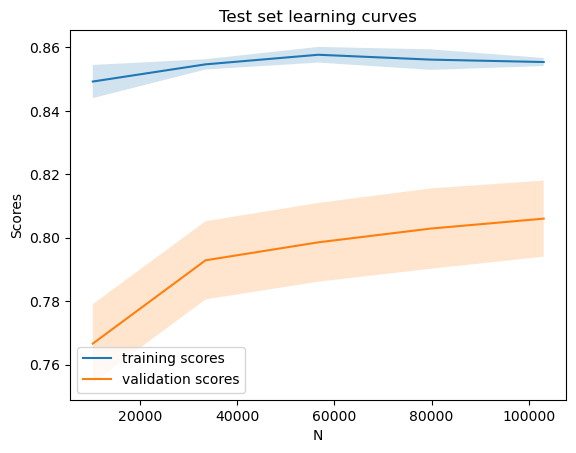

In [94]:
#plot learning curves for train and test data
plt.plot(train_sizes,train_avg_,label = 'training scores')
plt.plot(train_sizes,val_avg_,label = 'validation scores')

plt.fill_between(train_sizes.flatten(),(train_avg_ - train_std_).flatten(), (train_avg_ + train_std_).flatten(),alpha = 0.2)
plt.fill_between(train_sizes,(val_avg_ - val_std_).flatten(), (val_avg_ + val_std_).flatten(),alpha = 0.2)
plt.legend()
plt.title('Test set learning curves')
plt.ylabel('Scores')
plt.xlabel('N')
plt.show()
                

For the test data, the training score is actually higher than with the training data. However the validation scores are approximtely the same. The GBR scores for both trsting and training data  are much better than the the previous regression model.

In [25]:
#use the best parameters found by gridsearch to create new regressor
gbr_best= GradientBoostingRegressor(n_estimators = classifier.best_estimator_.n_estimators, learning_rate = classifier.best_estimator_.learning_rate,max_depth = classifier.best_estimator_.max_depth, min_samples_leaf = classifier.best_estimator_.min_samples_leaf)

In [27]:
results_best = cross_val_score(gbr_best ,train_data ,train_target ,cv = kfold ,scoring = 'r2',n_jobs = 8,verbose = 1) #get new validation scores


In [28]:
print("Mean R-squared (with best params) = {:.4f}".format(results_best.mean()))
print("Std R-squared = {:.4f}".format(results_best.std()))



Mean R-squared (with best params) = 0.8062
Std R-squared = 0.0124


Again this is sinificantly better than the initial regression model. We have a high R-squared value and low standard deviation on it.

In [36]:
history_best = gbr_best.fit(train_data,train_target.values.ravel())

Text(0.5, 0, 'Actual')

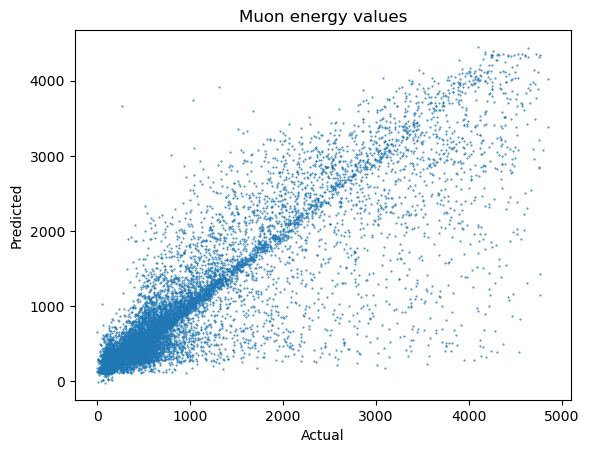

In [37]:
#get predicted energy values
predict_best = gbr_best.predict(test_data)

plt.scatter(test_target,predict_best,s = 0.2) #plot predicted vs actual energies
plt.title('Muon energy values')
plt.ylabel('Predicted')
plt.xlabel('Actual')

#The plot shows the predicted and actual energy values are much closer than in the previous regression
#approach since the points follow a y=x line more closely.

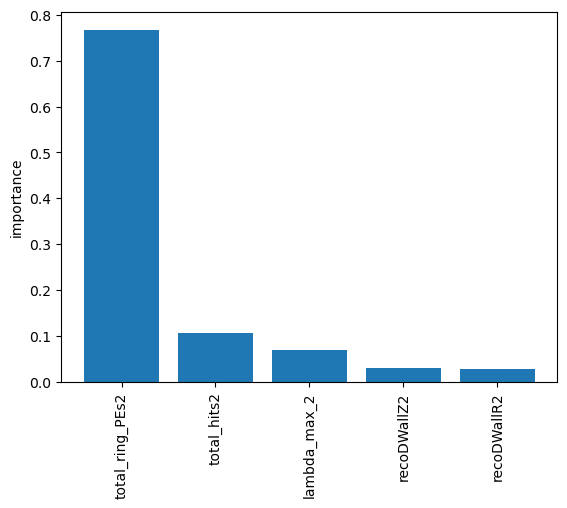

In [96]:
#Feature importance plots

importance= gbr_best.feature_importances_   #get the feature importances

feature_names = list(input_data.columns)
x_bar = np.arange(0,len(importance))

ind = np.argsort(importance)  #sort in ascending order importance

sorted_feats = []
sorted_names = []

#iterate through and append importances and features names in descending order 
for i in range(len(ind)):
    sorted_feats.append(importance[ind[-(1+i)]])
    sorted_names.append(feature_names[ind[-(1+i)]])

plt.bar(x_bar,sorted_feats)
plt.xticks(x_bar,sorted_names,rotation = 90)
plt.ylabel('importance')
plt.show()

By far the most important feature is the number of PMT hits at Cerenkov rings with importance just
under 0.8. The other facts are significantly less important, with the least important feature being
min dist from the reconstructed vertex to the closest barrel wall.